### Import Google Drive

In [232]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer as MICE
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load dataset

In [233]:
#Read and print the data.csv dataset
data_df = pd.read_excel("/content/drive/MyDrive/NBA_Draft_Prospects_23_21.xlsx")
# data_df = pd.read_csv("/content/drive/MyDrive/5 Guard_simplified_perGame_sportsref_download_4.csv")
col_names = data_df.columns.tolist()
print(data_df.head())
print(col_names)

                                                 URL             NAME  Rd  \
0  https://basketball.realgm.com/player/Efe-Abogi...      Efe Abogidi   0   
1  https://basketball.realgm.com/player/Amari-Bai...     Amari Bailey   2   
2  https://basketball.realgm.com/player/Emoni-Bat...      Emoni Bates   2   
3  https://basketball.realgm.com/player/Tarik-Bib...  Tarik Biberovic   2   
4  https://basketball.realgm.com/player/Anthony-B...    Anthony Black   1   

  PrimPos SecPos  AGE          SCHOOL/CLUB    HEIGHT  WEIGHT         STATUS  \
0       C    NaN   22      G League Ignite  6.833333     225       G League   
1       G    NaN   20                 UCLA  6.250000     191       Freshman   
2       G    NaN   20     Eastern Michigan  6.750000     190      Sophomore   
3       F    NaN   23  Fenerbahce (Turkey)  6.583333     218  International   
4       G    NaN   20             Arkansas  6.416667     210       Freshman   

   ... A-TOV% A-STL%  A-BLK%  A-USG%  A-Total S%  A-PPR  A-PPS

### Clean data

In [234]:
stat_option = 1 # 1 Wholeset 2 TotalGame 3 PerGame 4 TotalGame+Misc+Advanced 5 MostRelevant 6 Most relevant 7 Initial Set-up

if stat_option == 1: # Wholeset
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3'])
elif stat_option == 2: # Total Game
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3',
  'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA', 'P-FG%', 'P-3PM', 'P-3PA', 'P-3P%', 'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF',
  'M-DblDbl', 'M-TplDbl', 'M-40Pls', 'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB', 'M-Ast/TO', 'M-Stt/TO', 'M-FT/FGA', "M-W's", "M-L's", 'M-Win%', 'M-OWS', 'M-DWS', 'M-WS',
  'A-TS%', 'A-eFG%', 'A-ORB%', 'A-DRB%', 'A-TRB%', 'A-AST%', 'A-TOV%', 'A-STL%', 'A-BLK%', 'A-USG%', 'A-Total S%', 'A-PPR', 'A-PPS', 'A-ORtg', 'A-DRtg', 'A-PER'])
elif stat_option == 3: # Per Game
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3',
  'T-MIN', 'T-PTS', 'T-FGM', 'T-FGA', 'T-FG%', 'T-3PM', 'T-3PA', 'T-3P%', 'T-FTM', 'T-FTA', 'T-FT%', 'T-OFF', 'T-DEF', 'T-TRB', 'T-AST', 'T-STL', 'T-BLK', 'T-TOV', 'T-PF',
  'M-DblDbl', 'M-TplDbl', 'M-40Pls', 'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB', 'M-Ast/TO', 'M-Stt/TO', 'M-FT/FGA', "M-W's", "M-L's", 'M-Win%', 'M-OWS', 'M-DWS', 'M-WS',
  'A-TS%', 'A-eFG%', 'A-ORB%', 'A-DRB%', 'A-TRB%', 'A-AST%', 'A-TOV%', 'A-STL%', 'A-BLK%', 'A-USG%', 'A-Total S%', 'A-PPR', 'A-PPS', 'A-ORtg', 'A-DRtg', 'A-PER'])
elif stat_option == 4: # TotalGame+Misc+Advanced
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3',
  'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA', 'P-FG%', 'P-3PM', 'P-3PA', 'P-3P%', 'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF'])
elif stat_option == 5: # Most Relevant
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME' , 'SecPos', 'SCHOOL/CLUB', 'COUNTRY',
  'GP.1', 'GS.1', 'GP.2', 'GP.3',
  'AGE',  'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA',
  'P-3PM', 'P-3PA', 'P-3P%', 'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF',
   'T-MIN', 'T-PTS', 'T-FGM', 'T-FGA', 'T-3PM', 'T-3PA', 'T-3P%', 'T-FTM', 'T-FTA', 'T-FT%','T-AST', 'T-STL','T-TOV', 'M-Ast/TO','M-DblDbl',
  'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB',"M-L's", 'M-OWS', 'A-AST%','A-BLK%','A-DRB%','A-USG%', 'A-Total S%','A-ORtg', 'A-DRtg', 'A-PER',
  'A-ORB%',
 ])
elif stat_option == 6:
  # Drop columns
  df = data_df.drop(columns=['URL', 'NAME', 'SecPos', 'AGE', 'SCHOOL/CLUB',
  'COUNTRY', 'GS', 'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA', 'P-3PM', 'P-3PA', 'P-3P%',
  'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF',
  'GP.1', 'GS.1', 'T-MIN', 'T-PTS', 'T-FGM', 'T-FGA', 'T-3PM', 'T-3PA', 'T-3P%', 'T-FTM',
  'T-FTA', 'T-FT%','T-AST', 'GP.2','M-DblDbl', 'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB',
  "M-L's", 'M-OWS', 'GP.3','A-AST%','A-USG%', 'A-Total S%','A-ORtg', 'A-DRtg', 'A-PER'])
elif stat_option == 7:
  # Drop columns
  df = data_df.drop(columns=['Nb', 'Fg', 'Rd', 'Player', 'PSD', 'HEIGHT', 'SCHOOL/CLUB', 'COUNTRY'])
else:
  print("No option selected.")

'''
['URL', 'NAME', 'Rd', 'PrimPos', 'SecPos', 'AGE', 'SCHOOL/CLUB', 'HEIGHT', 'WEIGHT', 'STATUS', 'COUNTRY',
'GP', 'GS', 'P-MIN', 'P-PTS', 'P-FGM', 'P-FGA', 'P-FG%', 'P-3PM', 'P-3PA', 'P-3P%', 'P-FTM', 'P-FTA', 'P-FT%', 'P-OFF', 'P-DEF', 'P-TRB', 'P-AST', 'P-STL', 'P-BLK', 'P-TOV', 'P-PF',
'GP.1', 'GS.1', 'T-MIN', 'T-PTS', 'T-FGM', 'T-FGA', 'T-FG%', 'T-3PM', 'T-3PA', 'T-3P%', 'T-FTM', 'T-FTA', 'T-FT%', 'T-OFF', 'T-DEF', 'T-TRB', 'T-AST', 'T-STL', 'T-BLK', 'T-TOV', 'T-PF',
'GP.2', 'M-DblDbl', 'M-TplDbl', 'M-40Pls', 'M-20Reb', 'M-20Ast', 'M-Techs', 'M-HOB', 'M-Ast/TO', 'M-Stt/TO', 'M-FT/FGA', "M-W's", "M-L's", 'M-Win%', 'M-OWS', 'M-DWS', 'M-WS',
'GP.3', 'A-TS%', 'A-eFG%', 'A-ORB%', 'A-DRB%', 'A-TRB%', 'A-AST%', 'A-TOV%', 'A-STL%', 'A-BLK%', 'A-USG%', 'A-Total S%', 'A-PPR', 'A-PPS', 'A-ORtg', 'A-DRtg', 'A-PER']
'''
print(df.head())

   Rd PrimPos  AGE    HEIGHT  WEIGHT         STATUS  GP    GS  P-MIN  P-PTS  \
0   0       C   22  6.833333     225       G League  37  29.0   20.8   8.05   
1   2       G   20  6.250000     191       Freshman  30  29.0   26.8  11.17   
2   2       G   20  6.750000     190      Sophomore  30  30.0   33.5  19.23   
3   2       F   23  6.583333     218  International  36   8.0   13.1   4.50   
4   1       G   20  6.416667     210       Freshman  36  35.0   34.3  12.78   

   ...  A-TOV%  A-STL%  A-BLK%  A-USG%  A-Total S%  A-PPR  A-PPS  A-ORtg  \
0  ...   12.96    2.55    9.46   19.03      152.98  -3.09   1.42   121.0   
1  ...   19.42    2.49    1.35   23.83      158.18  -3.73   1.23   101.1   
2  ...   12.20    1.24    1.83   31.58      151.74  -4.66   1.21   101.8   
3  ...   11.78    1.77    0.46   18.07      154.30  -2.28   1.09   104.4   
4  ...   20.63    3.37    1.85   21.29      145.92  -1.18   1.40   104.8   

   A-DRtg  A-PER  
0    89.2  25.47  
1    92.3  16.90  
2   113.9  

In [235]:
# Exclude rows with 'G League', 'International', 'Overtime Elite', 'Draft Eligible', and 'Post-Graduate' status

df = df[(df['STATUS'] != 'G League') & (df['STATUS'] != 'International') & (df['STATUS'] != 'Overtime Elite')
& (df['STATUS'] != 'Draft Eligible') & (df['STATUS'] != 'Post-Graduate')]

df_status_unique = df['STATUS'].unique()
print(df_status_unique)

#Change status values into numerical values
d = {'Freshman':1, 'Sophomore':2, 'Junior':3, 'Senior':4}
df['STATUS'] = df['STATUS'].map(d)
print(df)

# df = df.drop(columns=['STATUS'])
# print(df)

['Freshman' 'Sophomore' 'Senior' 'Junior']
     Rd PrimPos  AGE    HEIGHT  WEIGHT  STATUS  GP    GS  P-MIN  P-PTS  ...  \
1     2       G   20  6.250000     191       1  30  29.0   26.8  11.17  ...   
2     2       G   20  6.750000     190       2  30  30.0   33.5  19.23  ...   
4     1       G   20  6.416667     210       1  36  35.0   34.3  12.78  ...   
5     1       G   24  6.583333     252       4  34  33.0   29.5  15.82  ...   
6     1       G   20  6.333333     187       2  33  33.0   34.0  14.00  ...   
..   ..     ...  ...       ...     ...     ...  ..   ...    ...    ...  ...   
243   2       G   25  6.500000     200       3  31  30.0   33.0  14.45  ...   
244   1       F   22  6.666667     185       1  20  14.0   27.8  10.70  ...   
245   0       F   25  6.750000     233       4  25  25.0   35.4  17.40  ...   
246   0       G   25  6.083333     196       4  32  32.0   32.5  15.22  ...   
247   2       G   25  6.166667     180       3  29  29.0   33.6  15.83  ...   

     A-T

In [236]:
# Exclude rows with No NCAA data label in GP column
df = df[df['GP'] != 'No NCAA data'] # drop row with NaN
df.dropna(subset=['GS'], inplace=True)

In [237]:
# Convert PrimPos to numerical values
if stat_option == 7:
  df_pos_unique = df['POS'].unique()
  #Change string values into numerical values
  d_pos = {'G':1, 'F':2, 'C':3} # Guard = 1, Forward = 2, Center = 3
  df['POS'] = df['POS'].map(d_pos)
else:
  df_pos_unique = df['PrimPos'].unique()
  #Change string values into numerical values
  d_pos = {'G':1, 'F':2, 'C':3} # Guard = 1, Forward = 2, Center = 3
  df['PrimPos'] = df['PrimPos'].map(d_pos)

print(df_pos_unique)
print(df)

['G' 'F' 'C']
     Rd  PrimPos  AGE    HEIGHT  WEIGHT  STATUS  GP    GS  P-MIN  P-PTS  ...  \
1     2        1   20  6.250000     191       1  30  29.0   26.8  11.17  ...   
2     2        1   20  6.750000     190       2  30  30.0   33.5  19.23  ...   
4     1        1   20  6.416667     210       1  36  35.0   34.3  12.78  ...   
5     1        1   24  6.583333     252       4  34  33.0   29.5  15.82  ...   
6     1        1   20  6.333333     187       2  33  33.0   34.0  14.00  ...   
..   ..      ...  ...       ...     ...     ...  ..   ...    ...    ...  ...   
243   2        1   25  6.500000     200       3  31  30.0   33.0  14.45  ...   
244   1        2   22  6.666667     185       1  20  14.0   27.8  10.70  ...   
245   0        2   25  6.750000     233       4  25  25.0   35.4  17.40  ...   
246   0        1   25  6.083333     196       4  32  32.0   32.5  15.22  ...   
247   2        1   25  6.166667     180       3  29  29.0   33.6  15.83  ...   

     A-TOV%  A-STL%  A-BL

In [238]:
pos_option = 3 # all positions 0, center 1, guard 2, forward 3

if pos_option == 0: # all positions 0
  pass# Do nothing
elif pos_option == 1: # center 1
  df = df[df['PrimPos'] == 3]
  df = df.drop(columns=['PrimPos'])
elif pos_option == 2: # guard 2
  df = df[df['PrimPos'] == 1]
  df = df.drop(columns=['PrimPos'])
elif pos_option == 3: # forward 3
  df = df[df['PrimPos'] == 2]
  df = df.drop(columns=['PrimPos'])
else:
  print("No position is selected.")

# # Split dataset based on position
# F_df = df[df['PrimPos'] == 2]
# C_df = df[df['PrimPos'] == 3]
# G_df = df[df['PrimPos'] == 1]

col_names = df.columns.tolist()
print(df.head())
print(col_names)

    Rd  AGE    HEIGHT  WEIGHT  STATUS  GP    GS  P-MIN  P-PTS  P-FGM  ...  \
7    2   23  6.666667     220       3  34  30.0   30.0  13.94   5.24  ...   
8    0   23  6.916667     230       4  26  26.0   31.2  15.96   5.77  ...   
11   1   19  6.833333     210       1  36  36.0   25.4   9.78   3.42  ...   
16   0   23  6.666667     217       4  32  32.0   31.4  15.06   5.84  ...   
23   1   20  6.833333     215       1  34  34.0   34.7  15.15   5.41  ...   

    A-TOV%  A-STL%  A-BLK%  A-USG%  A-Total S%  A-PPR  A-PPS  A-ORtg  A-DRtg  \
7    15.43    2.58    3.17   24.90      157.77  -3.36   1.45   115.3    88.7   
8    15.01    1.68    9.23   27.77      136.24  -2.26   1.38   108.1    90.0   
11   13.08    1.25    3.36   18.08      141.81  -2.68   1.39   117.0    88.8   
16   17.83    1.38    1.82   26.56      149.41   0.99   1.33   110.9    97.9   
23    9.89    1.58    6.15   21.35      165.33  -1.52   1.34   122.1    95.6   

    A-PER  
7   25.73  
8   26.49  
11  19.17  
16  22.7

Load Data

In [239]:
# Whole dataset
if stat_option == 7:
  X = df.drop(columns=['Rk'])
  y = df['Rk']
else:
  X = df.drop(columns=['Rd'])
  y = df['Rd']

# print(X)
# print(y)

MLP Model

In [240]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(61, 76) (16, 76)


https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

https://www.quora.com/What-happens-when-the-inputs-to-a-neural-network-are-highly-correlated

In [241]:
run = 0
if run == 1:
  mlp_gs = MLPClassifier(max_iter=500)
  parameter_space = {
      'hidden_layer_sizes': [(15, 15), (20,20,20),(40,40), (30, 30, 30)],
      'activation': ['tanh', 'relu'],
      'solver': ['sgd', 'adam'],
      'alpha': [0.0001, 0.005, 0.001],
      'learning_rate': ['constant','adaptive'],
  }
  from sklearn.model_selection import GridSearchCV
  clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
  clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels
  print('Best parameters found:\n', clf.best_params_)

In [242]:
from sklearn.neural_network import MLPClassifier

# Create MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(14,14), max_iter = 500, shuffle=True, random_state=42) # hidden_layer_sizes=(100, 50), max_iter=500, random_state=42

mlp = MLPClassifier(hidden_layer_sizes=(40, 40), #two layers with 40 nodes in each layer works best
                      activation='relu',
                      alpha=0.0001,
                      batch_size='auto',
                      epsilon=1e-08,
                      learning_rate='adaptive',
                      max_iter=500,
                      warm_start=True,
                      early_stopping=True,
                      shuffle=True,
                      random_state = 42,
                      solver = 'adam')

# mlp = MLPClassifier(hidden_layer_sizes=(10,10), activation='relu', solver='adam',
#                     alpha=0.001, batch_size='auto', learning_rate='constant',
#                     learning_rate_init=0.001, max_iter=400, shuffle=True,
#                     random_state=None, tol=0.0001, verbose=False, warm_start=False,
#                     momentum=0.9, nesterovs_momentum=True, early_stopping=False,
#                     validation_fraction=0.2, beta_1=0.9, beta_2=0.999, epsilon=1e-08,
#                     n_iter_no_change=10, max_fun=15000)

mlp.fit(X_train, y_train)

# Predict
y_predict_mlp_train = mlp.predict(X_train)
y_predict_mlp_test = mlp.predict(X_test)


from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(mlp, X, y, cv=5)  # Use 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())


Cross-validation scores: [0.375      0.4375     0.46666667 0.46666667 0.26666667]
Mean CV accuracy: 0.4025


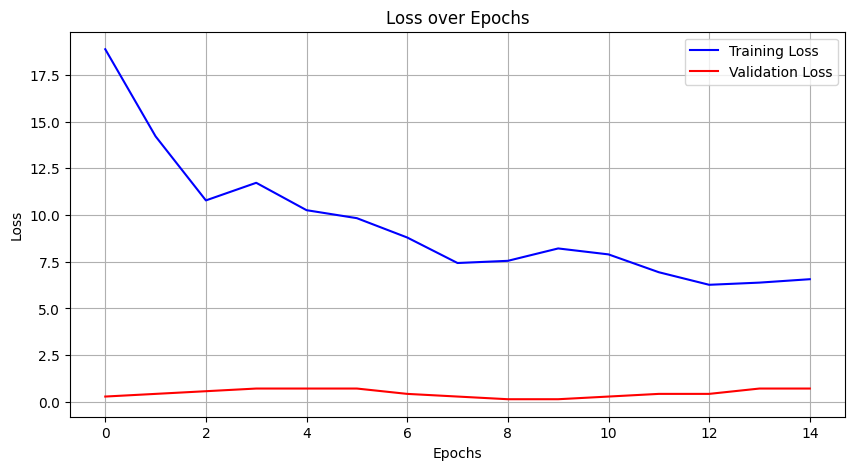

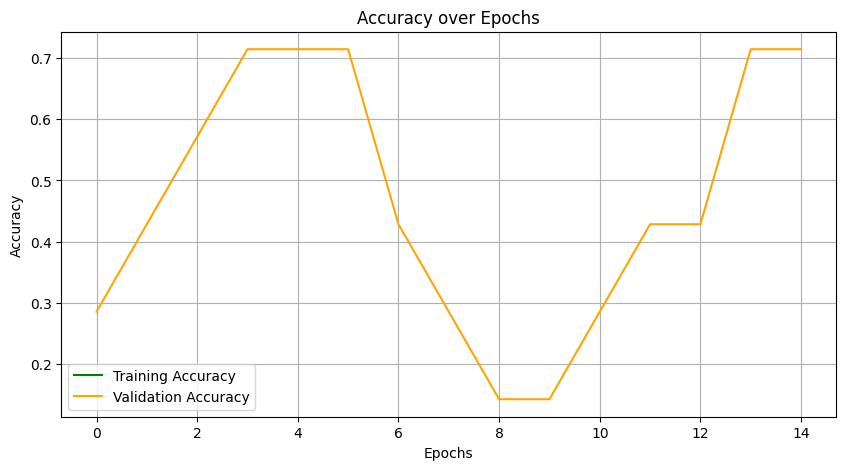

In [243]:
import matplotlib.pyplot as plt

# Accessing training history
training_loss = mlp.loss_curve_
training_accuracy = mlp.score(X_train, y_train)

# Access validation history
validation_loss = mlp.validation_scores_
validation_accuracy = mlp.validation_scores_

# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss', color='blue')
if validation_loss:
  plt.plot(validation_loss, label='Validation Loss', color='red')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy', color='green')
if validation_accuracy:
  plt.plot(validation_accuracy, label='Validation Accuracy', color='orange')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [244]:
from sklearn.metrics import accuracy_score
# print(y_predict_mlp_prob)
accuracy_train = accuracy_score(y_train, y_predict_mlp_train)
accuracy_test = accuracy_score(y_test, y_predict_mlp_test)

print("Accuracy on training data:", accuracy_train)
print("Accuracy on test data:", accuracy_test)

Accuracy on training data: 0.3442622950819672
Accuracy on test data: 0.4375
